# Dataset Information
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

|Variable||Description  |
|--------||-------------|
|Item_Identifier||	Unique product ID|
|Item_Weight|	|Weight of product|
|Item_Fat_Content|	|Whether the product is low fat or not|
|Item_Visibility|	|The % of total display area of the product in a store allocated|
|Item_Type|	|The category to which the product belongs|
|Item_MRP|	|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	|Unique store ID|
|Outlet_Establishment_Year|	|The year in which store was established|
|Outlet_Size|	|The size of the store in terms of ground area covered|
|Outlet_Location_Type|	|The type of city in which the store is located|
|Outlet_Type|	|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

# Importing Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading Dataset
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Description about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Some Statistical info about the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Checking unique values in the dataset
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# Lets check for missing values in our dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

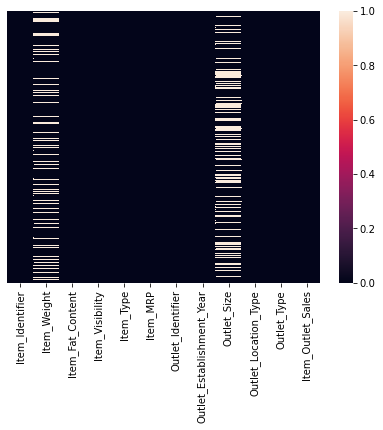

In [19]:
plt.subplots(figsize=(7,5))
sns.heatmap(df.isna(),yticklabels=False)

In [73]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [75]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [77]:
df["Outlet_Size"].fillna("Medium",inplace=True)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [78]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})


In [79]:
df["Item_Identifier"]=df["Item_Identifier"].apply(lambda x : x[0:2])
df["Item_Identifier"].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [81]:
df["Item_Identifier"].replace({'FD':'Food','DR':'Drink','NC':'Non-Consumable'},inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non-Consumable,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,Non-Consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [87]:
df["age_of_store"]=2020-df["Outlet_Establishment_Year"]
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,age_of_store
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,Food,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,Non-Consumable,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,Non-Consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


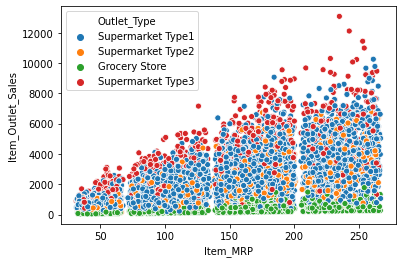

In [97]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=df,hue="Outlet_Type")


In [207]:
df1=pd.get_dummies(df[["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Type","Outlet_Identifier","Outlet_Size"]],drop_first=True)
df1

,Item_Identifier_Food,Item_Identifier_Non-Consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8519,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8520,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8521,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [109]:
df.dtypes!='object'

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility               True
Item_Type                    False
Item_MRP                      True
Outlet_Identifier            False
Outlet_Establishment_Year     True
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales             True
age_of_store                  True
dtype: bool

In [208]:
x=df[["Item_Weight","Item_Visibility","Item_MRP","age_of_store"]]
x=pd.concat([x,df1],axis=1)
print(x)
y=df[["Item_Outlet_Sales"]]
y

      Item_Weight  Item_Visibility  Item_MRP  age_of_store  \
0           9.300         0.016047  249.8092            21   
1           5.920         0.019278   48.2692            11   
2          17.500         0.016760  141.6180            21   
3          19.200         0.000000  182.0950            22   
4           8.930         0.000000   53.8614            33   
...           ...              ...       ...           ...   
8518        6.865         0.056783  214.5218            33   
8519        8.380         0.046982  108.1570            18   
8520       10.600         0.035186   85.1224            16   
8521        7.210         0.145221  103.1332            11   
8522       14.800         0.044878   75.4670            23   

      Item_Identifier_Food  Item_Identifier_Non-Consumable  \
0                        1                               0   
1                        0                               0   
2                        1                               0   
3      

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaled=StandardScaler()
scaled_x=scaled.fit_transform(x)
scaled_y=scaled.fit_transform(y)
scale1=MinMaxScaler()
scalex=scale1.fit_transform(scaled_x)
scaley=scale1.fit_transform(scaled_y)

In [132]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,y_train,y_test=train_test_split(scalex,scaley,test_size=0.3)

In [194]:
from sklearn.linear_model import LinearRegression


In [210]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

LinearRegression()

In [238]:
y_pred=reg_lin.predict(X_test)
reg_lin.score(X_test,y_test)

0.5837115437990995

In [147]:
from sklearn.svm import SVR

In [236]:
svreg=SVR(kernel="rbf")
svreg.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [239]:
svreg.score(X_test,y_test)

0.580932087217533

In [252]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, max_depth=5)

model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(max_depth=5, n_estimators=10)

In [253]:
model.score(X_test,y_test)

0.6257924982664254